In [2]:
!python --version

Python 2.7.13 :: Continuum Analytics, Inc.


In [3]:
import os
os.environ['CONDA_DEFAULT_ENV']

'astroconda'

# Dipper (sub-)list

The links below show the quick look lightcurve reduced using a K2 data pipeline called [K2SFF](https://archive.stsci.edu/prepds/k2sff/) available online.

* [EPIC203824153](https://www.cfa.harvard.edu/~avanderb/k2c2/ep203824153.html)
* [EPIC203937317](https://www.cfa.harvard.edu/~avanderb/k2c2/ep203937317.html)
* [EPIC204278916](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204278916.html)
* [EPIC204469637](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204469637.html)
* [EPIC204514548](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204514548.html)
* [EPIC204630363](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204630363.html)
* [EPIC204638512](https://www.cfa.harvard.edu/~avanderb/k2c2/ep204638512.html)
* [EPIC205151387](https://www.cfa.harvard.edu/~avanderb/k2c2/ep205151387.html)
* [EPIC203384911](https://www.cfa.harvard.edu/~avanderb/k2c2/ep203384911.html)

## Playing with data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

#load csv
df1 = pd.read_csv('data/203843911.csv', index_col=0)
df2 = pd.read_csv('data/203824153.csv', index_col=0)
df3 = pd.read_csv('data/203937317.csv', index_col=0)
df4 = pd.read_csv('data/204278916.csv', index_col=0)
df5 = pd.read_csv('data/204469637.csv', index_col=0)
df6 = pd.read_csv('data/204514548.csv', index_col=0)
df7 = pd.read_csv('data/204630363.csv', index_col=0)
df8 = pd.read_csv('data/204638512.csv', index_col=0)
df9 = pd.read_csv('data/205151387.csv', index_col=0)

df1.head()

,EPIC153
2060.284270,6223.242905
2060.304702,6236.089386
2060.325134,6259.457610
2060.345567,6282.849649
2060.365999,6256.764671


In [5]:
#concatenate
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
df = pd.concat(frames, axis=1)

#remove negative fluxes
df[df>0].head()

,EPIC153,EPIC317,EPIC916,EPIC548,EPIC637,EPIC363,EPIC512,EPIC387,EPIC911
2060.283697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2060.283812,NaN,NaN,16272.938683,NaN,NaN,NaN,NaN,NaN,NaN
2060.283833,NaN,NaN,NaN,NaN,NaN,NaN,281413.744662,NaN,NaN
2060.283854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79271.369015,NaN
2060.283931,NaN,NaN,NaN,NaN,NaN,122254.585294,NaN,NaN,NaN


There are uneven cadence in each dipper above but their difference is quite small.

How many data points per target after removing NaN in each?

In [6]:
for key in df.columns:
    print('{0}: {1}'.format(key, len(df[str(key)].dropna())))

EPIC153: 3811
EPIC317: 3811
EPIC916: 3811
EPIC548: 3811
EPIC637: 3811
EPIC363: 3811
EPIC512: 3811
EPIC387: 3811
EPIC911: 3811


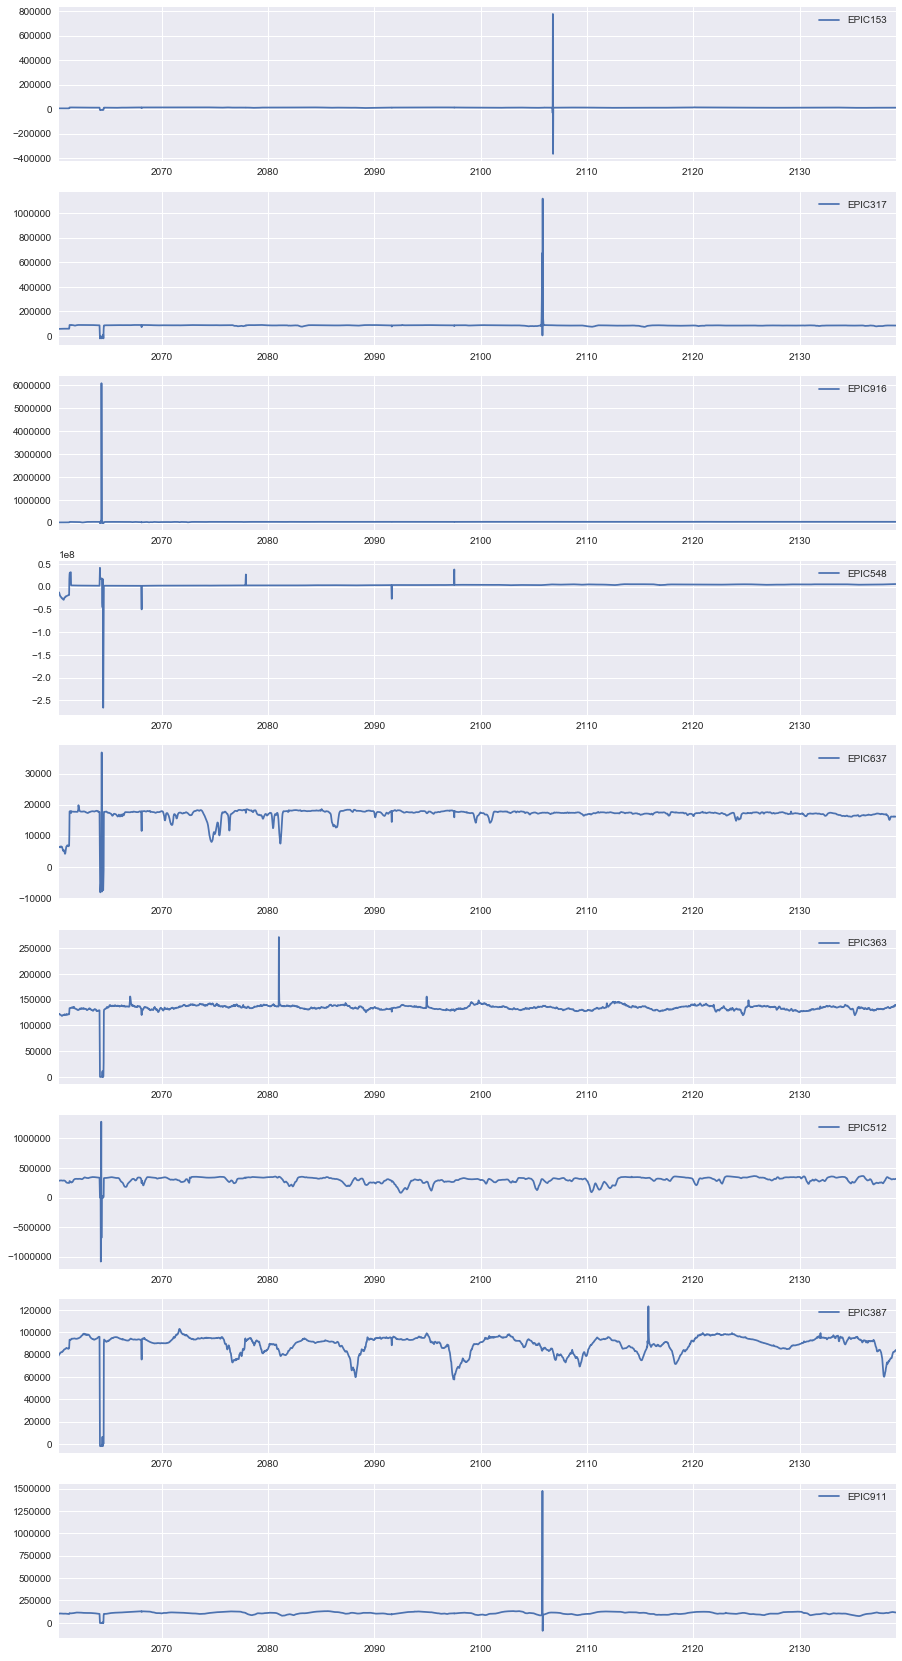

In [7]:
#df[df>0].plot(subplots=True, figsize=(15,30));

#colormap = plt.cm.Dark2.colors 
fig, ax = plt.subplots(nrows=9,ncols=1, figsize=(15,30))
for i,j in enumerate(df.columns):
    df[str(j)].dropna().plot(ax=ax[i], legend=True)

In [8]:
#remove na in each column
for i in df.columns:
    df[str(i)] = df[str(i)].dropna()

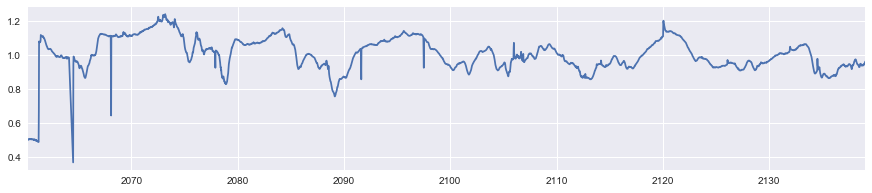

In [9]:
#remove outliers
sigma=1
EPIC153=df.EPIC153[np.abs(df.EPIC153-df.EPIC153.mean())<=(sigma*df.EPIC153.std())]
# normalize
EPIC153/=np.nanmedian(df.EPIC153)
EPIC153.plot(figsize=(15,3));

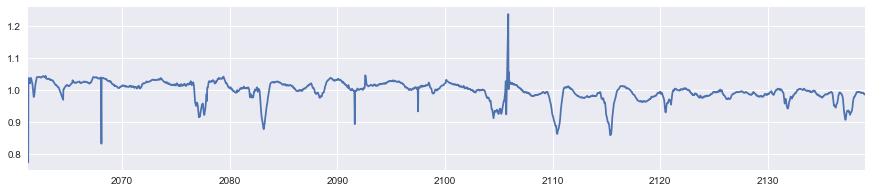

In [10]:
#remove outliers
sigma=1
EPIC317=df.EPIC317[np.abs(df.EPIC317-df.EPIC317.mean())<=(sigma*df.EPIC317.std())]
# normalize
EPIC317/=np.nanmedian(df.EPIC317)
EPIC317.plot(figsize=(15,3));

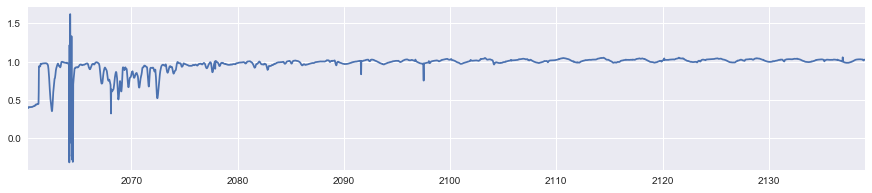

In [11]:
#remove outliers
sigma=1
EPIC916=df.EPIC916[np.abs(df.EPIC916-df.EPIC916.mean())<=(sigma*df.EPIC916.std())]
# normalize
EPIC916/=np.nanmedian(df.EPIC916)
EPIC916.plot(figsize=(15,3));

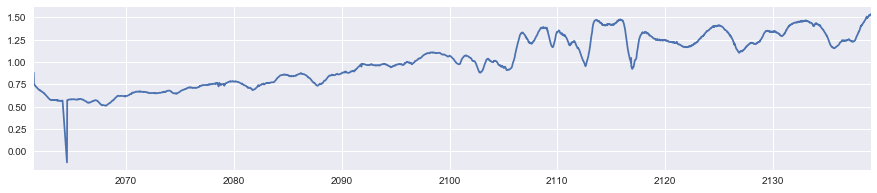

In [12]:
#remove outliers
sigma=1
EPIC548=df.EPIC548[np.abs(df.EPIC548-df.EPIC548.mean())<=(sigma*df.EPIC548.std())]
# normalize
EPIC548/=np.nanmedian(df.EPIC548)
EPIC548.plot(figsize=(15,3));

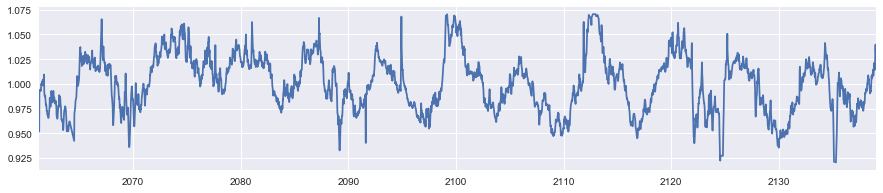

In [13]:
#remove outliers
sigma=1
EPIC363=df.EPIC363[np.abs(df.EPIC363-df.EPIC363.mean())<=(sigma*df.EPIC363.std())]
# normalize
EPIC363/=np.nanmedian(df.EPIC363)
EPIC363.plot(figsize=(15,3));

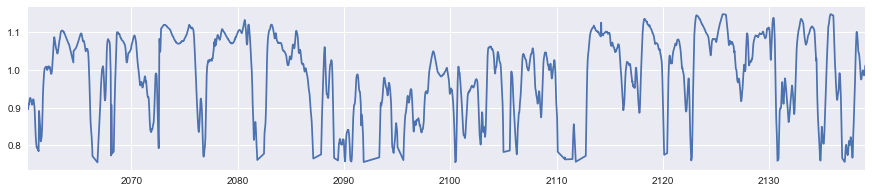

In [14]:
#remove outliers
sigma=1
EPIC512=df.EPIC512[np.abs(df.EPIC512-df.EPIC512.mean())<=(sigma*df.EPIC512.std())]
#normalize
EPIC512/=np.nanmedian(df.EPIC512)
EPIC512.plot(figsize=(15,3));

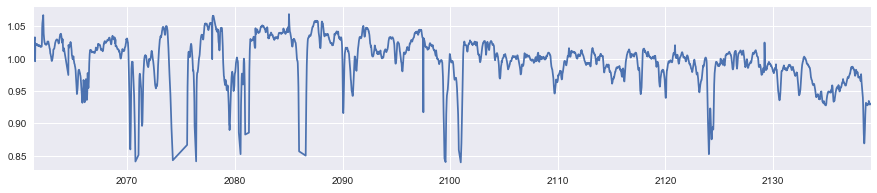

In [15]:
#remove outliers
sigma=1
EPIC637=df.EPIC637[np.abs(df.EPIC637-df.EPIC637.mean())<=(sigma*df.EPIC637.std())]
#normalize
EPIC637/=np.nanmedian(df.EPIC637)
EPIC637.plot(figsize=(15,3));

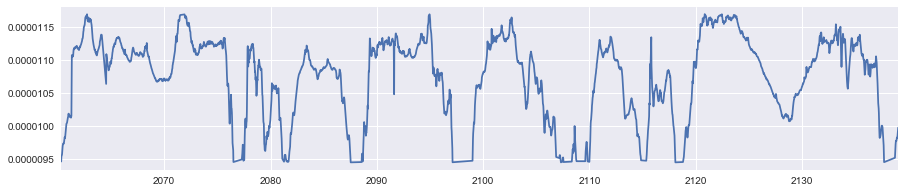

In [16]:
#remove outliers
sigma=1
EPIC387=df.EPIC387[np.abs(df.EPIC387-df.EPIC387.mean())<=(sigma*df.EPIC387.std())]/np.nanmedian(df.EPIC387)
# normalize
EPIC387/=np.nanmedian(df.EPIC387)
EPIC387.plot(figsize=(15,3));

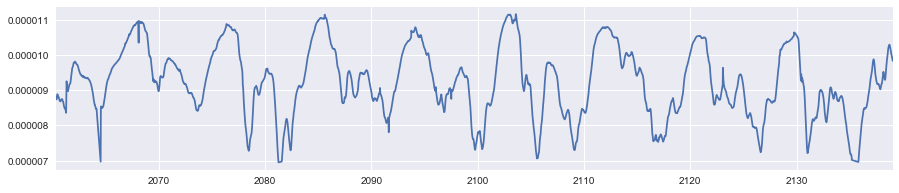

In [17]:
#remove outliers
sigma=1
EPIC911=df.EPIC911[np.abs(df.EPIC911-df.EPIC911.mean())<=(sigma*df.EPIC911.std())]/np.nanmedian(df.EPIC911)
# normalize
EPIC911/=np.nanmedian(df.EPIC911)
EPIC911.plot(figsize=(15,3));

## Phase-folding: Lomb-Scargle Periodogram

In [18]:
import gatspy
from gatspy.periodic import LombScargleFast

periods={}
powers ={}
for i in df.columns:
    t, f = df[str(i)].dropna().index, df[str(i)].dropna()
    model = LombScargleFast().fit(t, f)
    periods[str(i)], powers[str(i)] = model.periodogram_auto(nyquist_factor=100)

In [19]:
periods.keys()

['EPIC363',
 'EPIC317',
 'EPIC916',
 'EPIC637',
 'EPIC153',
 'EPIC911',
 'EPIC512',
 'EPIC387',
 'EPIC548']

In [20]:
#determine peak period in each lightcurve
for j,key in enumerate(periods.keys()):
    idx1 = periods[key] > 1.0
    idx2 = np.argmax(powers[key][idx1])
    peak = periods[key][idx1][idx2]
    print('{0}: {1:.2f} d'.format(key,peak))

EPIC363: 6.56 d
EPIC317: 2.72 d
EPIC916: 7.57 d
EPIC637: 393.82 d
EPIC153: 12.31 d
EPIC911: 8.95 d
EPIC512: 49.23 d
EPIC387: 10.10 d
EPIC548: 393.82 d


EPIC637 and EPIC548 have anomalously long "periods"

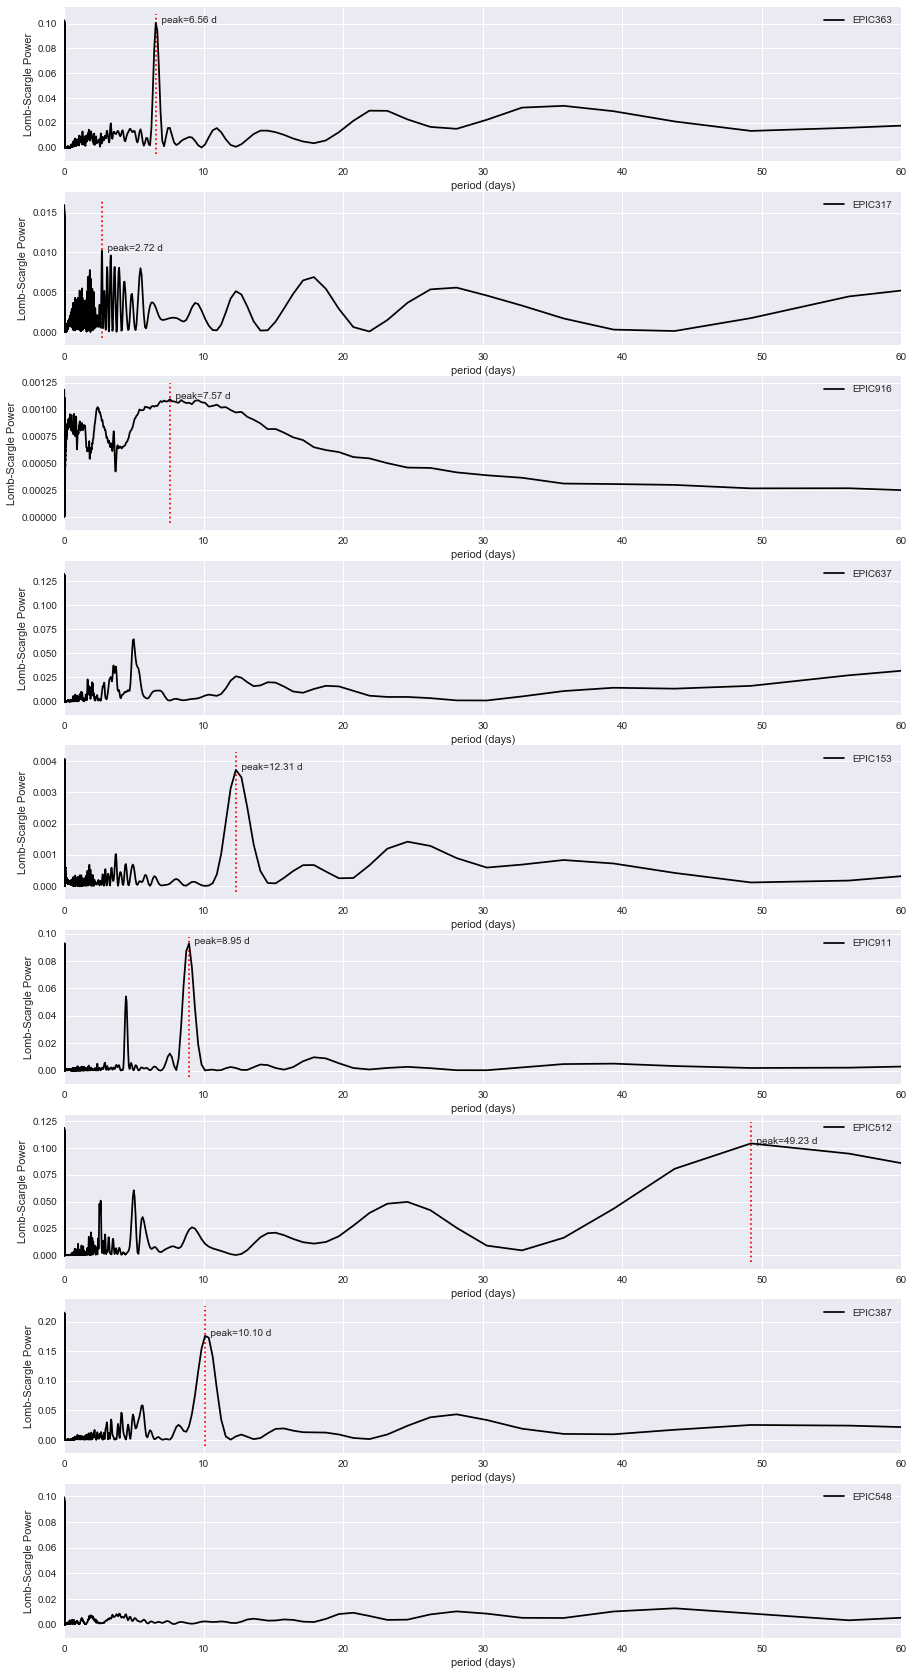

In [22]:
import seaborn as sb

fig, ax = plt.subplots(nrows=9,ncols=1,figsize=(15,30))

for j,key in enumerate(periods.keys()):
    idx1 = periods[key] > 1.0
    idx2 = np.argmax(powers[key][idx1])
    peak = periods[key][idx1][idx2]
    try:
        with sb.axes_style('white'):
            ax[j].plot(periods[key], powers[key], 'k-', label=key)
            
            xlim=60
            ax[j].set(xlim=(0, xlim),
        #         , ylim=(0, 0.01),
               xlabel='period (days)',
               ylabel='Lomb-Scargle Power')
            ax[j].vlines(peak, *ax[j].get_ylim(), linestyles='dotted', colors='r')
            if  peak < xlim:
                ax[j].text(peak, powers[key][idx1][idx2], '  peak={0:.2f} d'.format(peak))
        ax[j].legend()
    except:
        pass

Phase-folding functions.

In [22]:
def get_tns(t, p, t0):

    idx = t != 0
    t = t[idx]

    while t0-p > t.min():
        t0 -= p
    if t0 < t.min():
        t0 += p

    tns = [t0+p*i for i in range(int((t.max()-t0)/p+1))]

    while tns[-1] > t.max():
        tns.pop()

    while tns[0] < t.min():
        tns = tns[1:]

    return tns


def extract_individual(star, p, t0, width=1):

    t, f = star.time, star.flux
    idx = np.isfinite(t) & np.isfinite(f)
    t, f = t[idx], f[idx]

    tns =  get_tns(t, p, t0)

    transits = []
    for i,tn in enumerate(tns):
        idx = (t > tn - width/2.) & (t < tn + width/2.)
        if idx.sum() == 0:
            continue
        ti = t[idx].tolist()
        fi = f[idx].tolist()
        transits.append((ti,fi))

    return transits

def fold(t, f, p, t0, width=0.4, clip=False, bl=False, t14=0.2):
    tns = get_tns(t, p, t0)
    tf, ff = np.empty(0), np.empty(0)
    for i,tn in enumerate(tns):
        idx = (t > tn - width/2.) & (t < tn + width/2.)
        ti = t[idx]-tn
        fi = f[idx]
        fi /= np.nanmedian(fi)
        if bl:
            idx = (ti < -t14/2.) | (ti > t14/2.)
            assert np.isfinite(ti[idx]).all() & np.isfinite(fi[idx]).all()
            assert idx.sum() > 0
            try:
                res = sm.RLM(fi[idx], sm.add_constant(ti[idx])).fit()
                if np.abs(res.params[1]) > 1e-2:
                    print('bad data probably causing poor fit')
                    print('transit {} baseline params: {}'.format(i, res.params))
                    continue
                model = res.params[0] + res.params[1] * ti
                fi = fi - model + 1
            except:
                print("error computing baseline for transit {}".format(i))
                print("num. points: {}".format(idx.sum()))
                print(ti)
        tf = np.append(tf, ti)
        ff = np.append(ff, fi / np.nanmedian(fi))
    idx = np.argsort(tf)
    tf = tf[idx]
    ff = ff[idx]
    if clip:
        fc = sigma_clip(ff, sigma_lower=10, sigma_upper=2)
        tf, ff = tf[~fc.mask], ff[~fc.mask]
    return tf, ff

Determine t0.

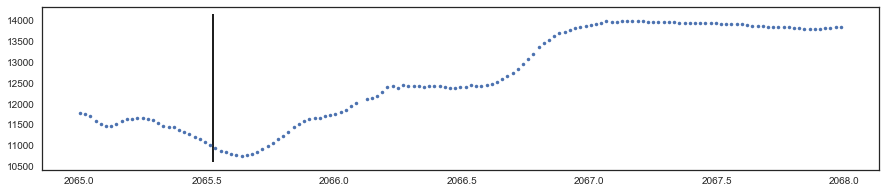

In [23]:
#test in one sample
t, f = df.EPIC153.dropna().index, df.EPIC153.dropna()
idx = (2065 < t) & (t < 2068)

tsub, fsub = t[idx], f[idx]
idx = fsub < np.median(fsub) - 0.5 * np.std(fsub)
t0 = np.median(tsub[idx])

with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,3))
    ax.plot(tsub, fsub, '.')
    ax.vlines(t0, *ax.get_ylim())

Fold at t0 given period.

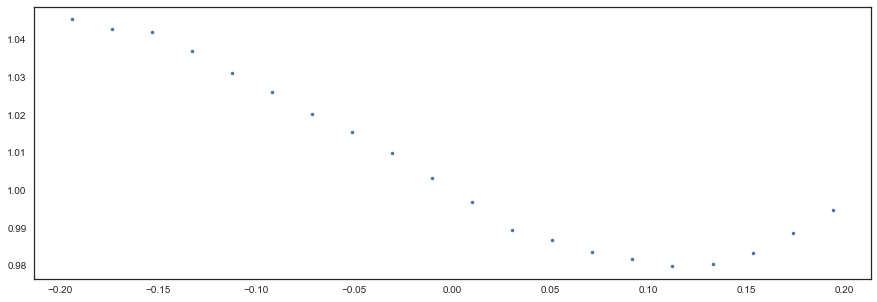

In [24]:
tf, ff = fold(df.EPIC153.dropna().index, df.EPIC153.dropna(), peak, t0)
with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.plot(tf, ff, '.')

Try to phase-fold all the 9 lightcurves.

/home/jp/miniconda2/envs/astroconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jp/miniconda2/envs/astroconda/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


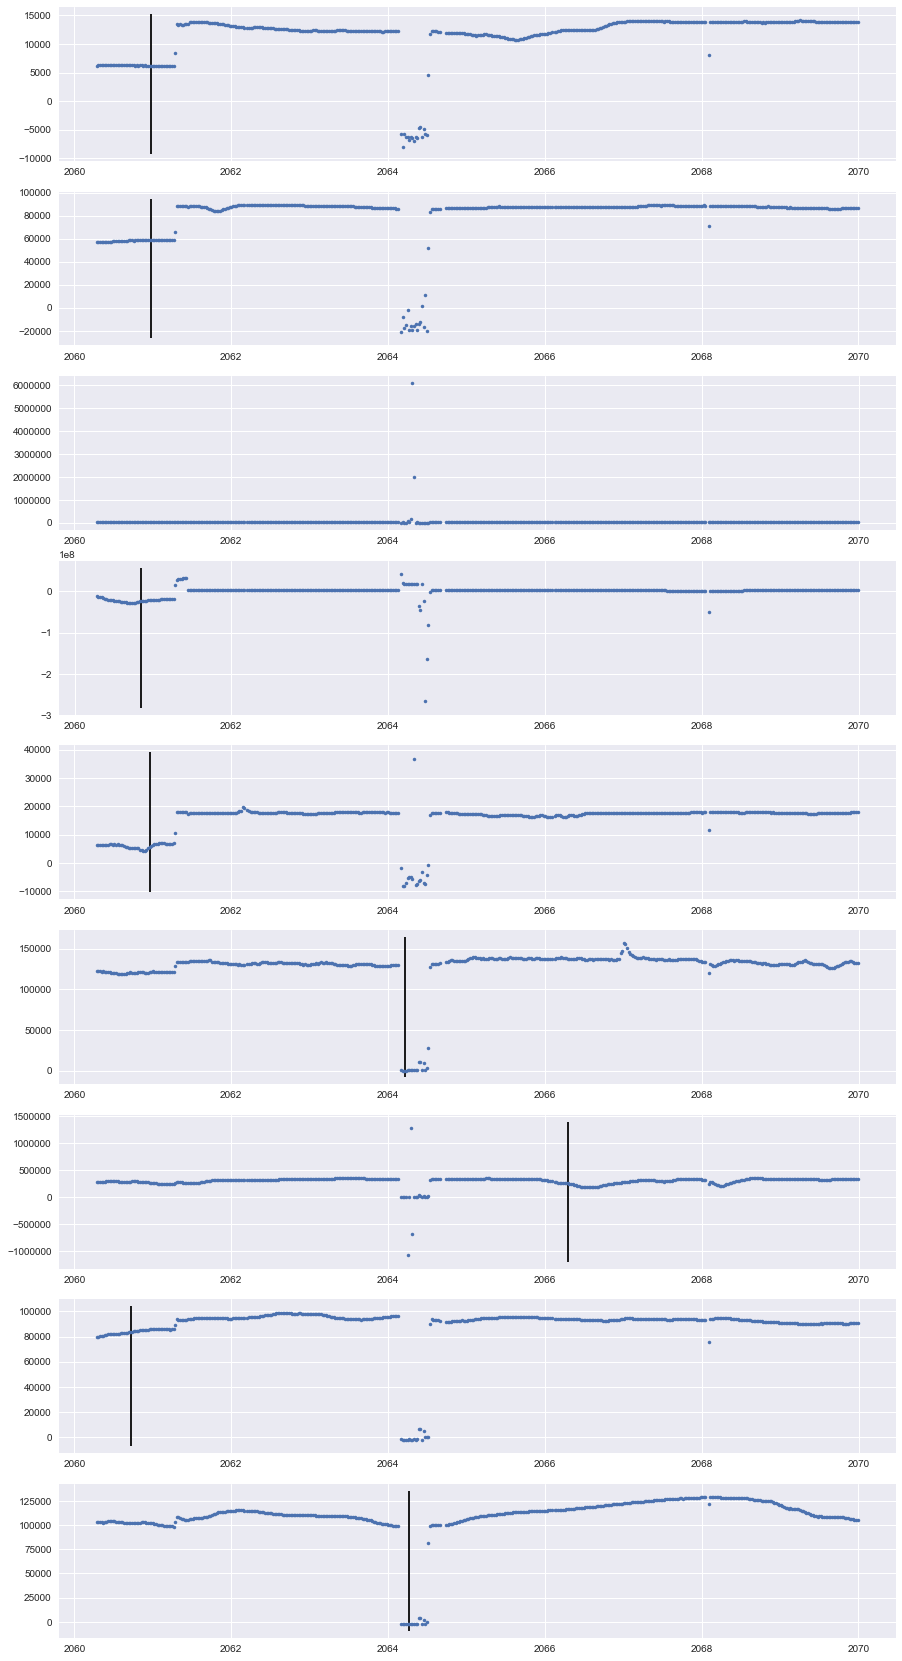

In [25]:
fig, ax = plt.subplots(nrows=9,ncols=1,figsize=(15,30))

for i, key in enumerate(df.columns):
    t, f = df[str(key)].dropna().index, df[str(key)].dropna()
    
    #constraint
    idx = (2060 < t) & (t < 2070)

    tsub, fsub = t[idx], f[idx]
    idx = fsub < np.median(fsub) - 0.5 * np.std(fsub)
    t0 = np.median(tsub[idx])

    with sb.axes_style('white'):
        ax[i].plot(tsub, fsub, '.')
        ax[i].vlines(t0, *ax[i].get_ylim())

## Autocorrelation

Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band.

In [26]:
df.keys()

Index([u'EPIC153', u'EPIC317', u'EPIC916', u'EPIC548', u'EPIC637', u'EPIC363',
       u'EPIC512', u'EPIC387', u'EPIC911'],
      dtype='object')

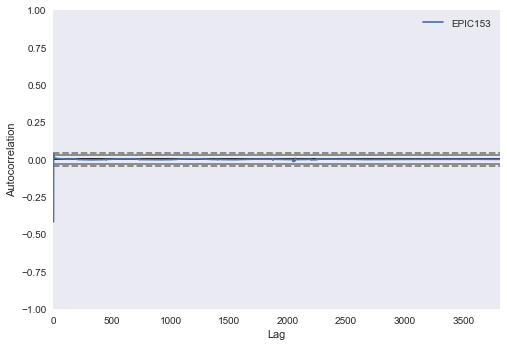

In [27]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.EPIC153.dropna(), label='EPIC153');

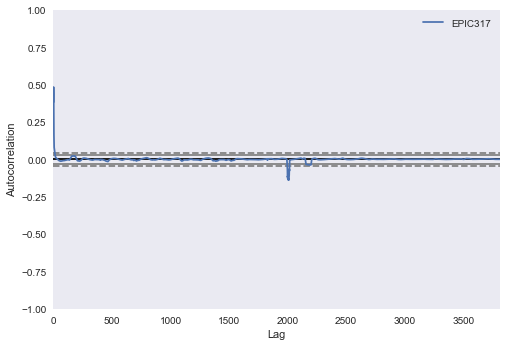

In [28]:
autocorrelation_plot(df.EPIC317.dropna(), label='EPIC317');

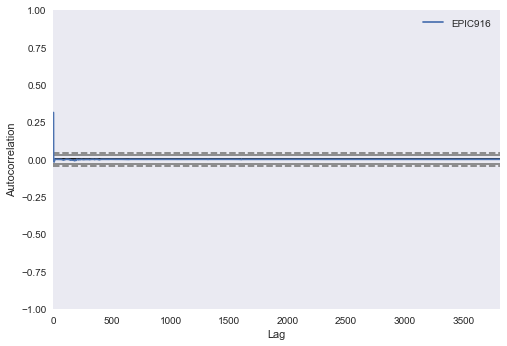

In [29]:
autocorrelation_plot(df.EPIC916.dropna(), label='EPIC916');

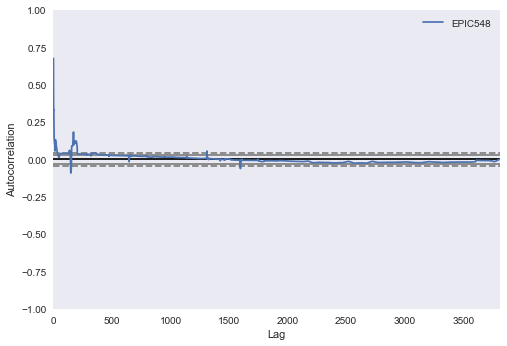

In [30]:
autocorrelation_plot(df.EPIC548.dropna(), label='EPIC548');

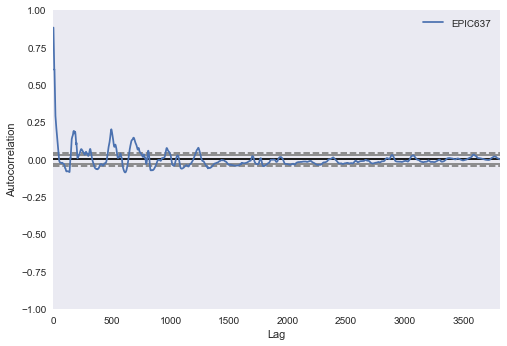

In [31]:
autocorrelation_plot(df.EPIC637.dropna(), label='EPIC637');

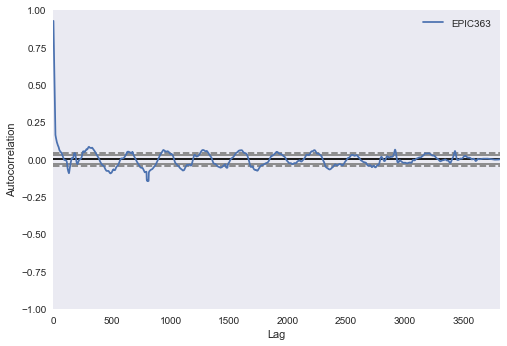

In [32]:
autocorrelation_plot(df.EPIC363.dropna(), label='EPIC363');

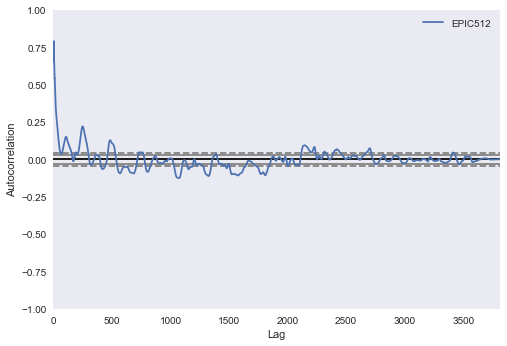

In [33]:
autocorrelation_plot(df.EPIC512.dropna(), label='EPIC512');

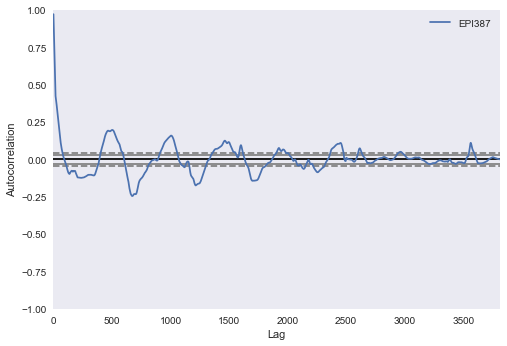

In [34]:
autocorrelation_plot(df.EPIC387.dropna(), label='EPI387');

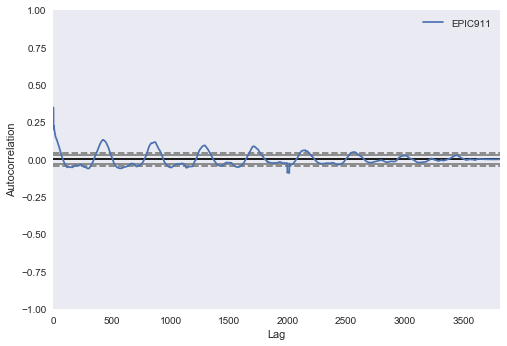

In [35]:
autocorrelation_plot(df.EPIC911.dropna(), label='EPIC911');